# Importing libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import requests

In [4]:
import random

In [5]:
pip install beautifulsoup4 as bs4

     |████████████████████████████████| 122kB 12.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lxml

     |████████████████████████████████| 5.5MB 6.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install geocoder

     |████████████████████████████████| 102kB 5.2MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 829kB 17.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [9]:
import geocoder

In [10]:
pip install geopy

     |████████████████████████████████| 112kB 21.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
from geopy.geocoders import Nominatim

In [12]:
from pandas.io.json import json_normalize

In [13]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.cluster import KMeans

In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [19]:
pip install geopandas

     |████████████████████████████████| 972kB 9.3MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 31.4MB/s eta 0:00:01     |█████████████████▉              | 573kB 31.4MB/s eta 0:00:01     |██████████████████████████████▎ | 972kB 31.4MB/s eta 0:00:01
     |████████████████████████████████| 14.8MB 9.0MB/s eta 0:00:01:01
     |████████████████████████████████| 6.5MB 5.2MB/s eta 0:00:01eta 0:00:02███████████                     | 2.2MB 5.2MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
Note: you may need to restart the kernel to use updated packages.


# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction/Business Problem

The problem we are trying to solve is to help potential restaurant owners choose a location to set up their restaurant at. For the sake of this project we are narrowing it down to restaurants specialising in pizza. However, it can be adjusted for restaurants serving other cuisine by filtering the data accordingly.

The background of the city chosen would be New York, which is a cultural mixing pot and thus, also one for cuisine. Due to the city's immigrant history, there is a wide range of cuisines that reside in New York. From Jewish immigrants, we have knishes, gefilte fish and pastrami. Italians bringing in pizza and pasta and making it a staple in New York. To Chinese and other Asian restaurants with fried rice and sesame chicken. Even Middle Eastern foods such as kebabs and falafels are common place in modern New York street food. 

Thus, New York is a prime location for potential business owners to consider starting a restaurant in, ranging from the humble street food to the haute cuisine. With the 2017 edition of the Michelin guide featuring 77 establishments in NYC with Michelin stars. Next the problem would be to decide where to open the restaurant at. Basing it on several selection criterion, the other restaurants that serve similar cuisine can be seen as competition they may wish to avoid, the population of the neighbourhood etc.

Hopefully this analysis would prove useful to potential business owners looking to foray into the restaurant business as it may be a tool for them to consider using. Since, it would allow them to make a decision based on data instead of randomly choosing a location which might not be optimal for them. Potentially, helping them save on rental costs in non-optimal locations and instead choose an optimal location to start based on data from the get-go. 

# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

We are trying to find an optimal location for a pizza restaurant. The report would be most relevant to stakeholders wanting to start opening a **pizza restaurant** in **New York**, USA.

As there are many competitive restaurants in New York, we would attempt to pin point **locations which aren't filled with too many restaurants**. Additionally, it would be a plus point if there were **no direct competitors such as pizza restaurants within the vicinity**. Thereafter when both conditiions are met, we would then find the **location with the highest footfall**.

Based on the criterion above, we would look to zoom into several potential boroughs, where the pros and cons would be stated clearly for the final decision to be in the hands of the stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* number of and distance to Pizza restaurants in the neighborhood, if any
* number of residents in the area

We decided to use regularly spaced grid of locations, centered around city center, to define our boroughs.

In this project, we will fetch or extract data from the following data sources:
* centers of potential areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google geocoding API**
* number of restaurants and their type and location in every borough will be obtained using **Foursquare API**
* Population census from https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City to infer areas with higher human traffic.

In [20]:
CLIENT_ID = 'Q01QMQZYR05G31NJMZO0ULH3VOJK2EBSWWDGUE0WZZ0E4O1Z' # your Foursquare ID
CLIENT_SECRET = 'ELAR41HL5R3NLQ0QMZO1XXICG05X1213E4IZJOR3IGVKMOJC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q01QMQZYR05G31NJMZO0ULH3VOJK2EBSWWDGUE0WZZ0E4O1Z
CLIENT_SECRET:ELAR41HL5R3NLQ0QMZO1XXICG05X1213E4IZJOR3IGVKMOJC


In [21]:
#Using beautifulsoup to scrape text data from the url below.

from bs4 import BeautifulSoup

source = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City').text

soup = BeautifulSoup(source, 'html5lib')

tables = soup.find_all("table")

table = tables[0]
tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                        for row in table.find_all("tr")]
df = pd.DataFrame(tab_data)

df.columns = df.iloc[0,:]
df.drop(index=0,inplace=True)

tabs_dic = {}
    
df.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n"
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n"
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n"
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit..."


In [22]:
#Using foursquare API to generate a list of pizza places in New York.

LIMIT = 100 # Maximum is 100
cities = ["New York, NY"]
results = {}
for city in cities:
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        city,
        LIMIT,
        "4bf58dd8d48988d1ca941735") #pizza places ID
    results[city] = requests.get(url).json()

In [23]:
df_venues={}
for city in cities:
    venues = pd.json_normalize(results[city]['response']['groups'][0]['items'])
    df_venues[city] = venues[['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    df_venues[city].columns = ['Name', 'Address', 'Lat', 'Lng']

In [24]:
maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)

    # add markers to map
    for lat, lng, label in zip(df_venues[city]['Lat'], df_venues[city]['Lng'], df_venues[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])  
    print(f"Total number of pizza places in {city} = ", results[city]['response']['totalResults'])
    print("Showing Top 100")

Total number of pizza places in New York, NY =  269
Showing Top 100


In [25]:
#Showing the pizza places on the New York map.

maps[cities[0]]

In [26]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, New York, NY'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('Melrose')

[40.82443000000006, -73.91069999999996]

In [27]:
df_2 = df.copy()

In [28]:
df_2.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n"
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n"
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n"
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit..."


In [29]:
#Adding postal codes to neighborhoods

df_2.insert(5, "postal_code", [10451, 10455, 10456, 10452, 10453, 10457, 10458, 10471, 10472, 10464, 10467, 10469, 11222, 11201, 11205, 11206, 11231, 11207, 11213, 11228, 11232, 11204, 11218, 11223, 11209,
                               11212, 11214, 11233, 11203, 11234, 10280, 10004, 10013, 10009, 10001, 10016, 10010, 10023, 10021, 10031, 10026, 10029, 10034, 11101, 11104, 11372, 11368, 11385, 11375, 11357,
                               11435, 11415, 11414, 11358, 11436, 11426, 11692, 10305, 10301, 10312], True) 

In [30]:
df_2.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n,postal_code
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n",10451
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n",10455
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",10456
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n",10452
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",10453


In [31]:
# Retrieving Postal Code Co-ordinates
postal_codes = df_2['Community Board(CB)']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [32]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_2['Latitude'] = df_coords['Latitude']
df_2['Longitude'] = df_coords['Longitude']

In [33]:
df_2.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n,postal_code,Latitude,Longitude
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n",10451,40.826,-73.92309
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n",10455,40.826,-73.92309
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",10456,40.826,-73.92309
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n",10452,40.826,-73.92309
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",10453,40.826,-73.92309


In [34]:
df_2.drop(df.tail(1).index,inplace=True) # drop last row
df_2

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n,postal_code,Latitude,Longitude
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n",10451,40.826000,-73.923090
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n",10455,40.826000,-73.923090
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",10456,40.826000,-73.923090
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n",10452,40.826000,-73.923090
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",10453,40.826000,-73.923090
6,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms\n",10457,40.826000,-73.923090
7,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights\n",10458,40.826000,-73.923090
8,Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, M...",10471,40.826000,-73.923090
9,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi...",10472,40.826000,-73.923090
10,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ...",10464,40.826000,-73.923090


In [35]:
address = 'New York,NY'

geolocator = Nominatim(user_agent="CourseraLab")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of New York City,NY are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of New York City,NY are 40.7127281, -74.0060152.


In [36]:
map_NewYork = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhoods\n']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [37]:
# create map of New York displaying the Neighborhood data

map_ny = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)


# add markers to map
for lat, lng, neighborhood in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhoods\n']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    

In [38]:
map_ny

In [39]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
     radius, 
     LIMIT,
    "4bf58dd8d48988d1ca941735")
results = requests.get(url).json()

In [40]:
venues=results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.url',
       'venue.delivery.provider.name', 'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes',
       'venue.delivery.provider.icon.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id',
       'venue.location.neighborhood'],
      dtype='object')

In [41]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Joe’s Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",40.710178,-74.007769
1,Da Mikele,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",40.718760,-74.005161
2,La Pizza & La Pasta,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",40.710567,-74.012494
3,Eataly Downtown,"[{'id': '4bf58dd8d48988d1f5941735', 'name': 'G...",40.710075,-74.011976
4,Gigino Trattoria,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",40.717300,-74.010688


In [43]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns taking the first word from the back
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Joe’s Pizza,Pizza Place,40.710178,-74.007769
1,Da Mikele,Pizza Place,40.718760,-74.005161
2,La Pizza & La Pasta,Pizza Place,40.710567,-74.012494
3,Eataly Downtown,Gourmet Shop,40.710075,-74.011976
4,Gigino Trattoria,Italian Restaurant,40.717300,-74.010688


In [44]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Pizza Place            44
Italian Restaurant      4
Burger Joint            3
Deli / Bodega           2
Bar                     2
Mexican Restaurant      1
Gourmet Shop            1
Grocery Store           1
American Restaurant     1
Lounge                  1
Name: categories, dtype: int64

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
# Nearby Venues
NewYork_venues = getNearbyVenues(names=df_2['Neighborhoods\n'],
                                   latitudes=df_2['Latitude'],
                                   longitudes=df_2['Longitude']
                                  )

Melrose, Mott Haven, Port Morris

Hunts Point, Longwood

Claremont, Concourse Village, Crotona Park, Morrisania

Concourse, Highbridge

Fordham, Morris Heights, Mount Hope, University Heights

Bathgate, Belmont, East Tremont, West Farms

Bedford Park, Norwood, University Heights

Fieldston, Kingsbridge, Kingsbridge Heights, Marble Hill, Riverdale, Spuyten Duyvil, Van Cortlandt Village

Bronx River, Bruckner, Castle Hill, Clason Point, Harding Park, Parkchester, Soundview, Unionport

City Island, Co-op City, Locust Point, Pelham Bay, Silver Beach, Throgs Neck, Westchester Square

Allerton, Bronxdale, Indian Village, Laconia, Morris Park, Pelham Gardens, Pelham Parkway, Van Nest

Baychester, Edenwald, Eastchester, Fish Bay, Olinville, Wakefield, Williamsbridge, Woodlawn Heights

Greenpoint, Williamsburg, Williamsburg Houses

Boerum Hill, Brooklyn Heights, Brooklyn Navy Yard, Clinton Hill, Dumbo, Fort Greene, Fulton Ferry, Fulton Mall, Vinegar Hill

Bedford-Stuyvesant, Ocean Hill, Stuyves

In [47]:
print('There are {} Uniques Categories.'.format(len(NewYork_venues['Venue Category'].unique())))
NewYork_venues.groupby('Neighborhood').count().head()

There are 122 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Allerton, Bronxdale, Indian Village, Laconia, Morris Park, Pelham Gardens, Pelham Parkway, Van Nest\n",48,48,48,48,48,48
"Alphabet City, Chinatown, East Village, Lower East Side, Two Bridges\n",96,96,96,96,96,96
"Annadale, Arden Heights, Bay Terrace, Charleston, Eltingville, Great Kills, Greenridge, Huguenot, Pleasant Plains, Prince's Bay, Richmond Valley, Rossville, Tottenville, Woodrow\n",99,99,99,99,99,99
"Astoria, Astoria Heights, Queensbridge, Dutch Kills, Long Island City, Ravenswood, Rikers Island, Steinway\n",49,49,49,49,49,49
"Auburndale, Bayside, Douglaston, East Flushing, Hollis Hills, Little Neck, Oakland Gardens\n",49,49,49,49,49,49


In [48]:
# one hot encoding
NewYork_onehot = pd.get_dummies(NewYork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NewYork_onehot['Neighborhood'] = NewYork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NewYork_onehot.columns[-1]] + list(NewYork_onehot.columns[:-1])
NewYork_onehot = NewYork_onehot[fixed_columns]
NewYork_grouped = NewYork_onehot.groupby('Neighborhood').mean().reset_index()
NewYork_onehot.head(5)

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Australian Restaurant,Automotive Shop,Baby Store,Bagel Shop,Baggage Locker,...,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Melrose, Mott Haven, Port Morris\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Melrose, Mott Haven, Port Morris\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Melrose, Mott Haven, Port Morris\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Melrose, Mott Haven, Port Morris\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Melrose, Mott Haven, Port Morris\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
num_top_venues = 5
for hood in NewYork_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =NewYork_grouped[NewYork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Allerton, Bronxdale, Indian Village, Laconia, Morris Park, Pelham Gardens, Pelham Parkway, Van Nest
 ----
                  venue  freq
0         Deli / Bodega  0.08
1            Sports Bar  0.06
2                 Plaza  0.06
3  Fast Food Restaurant  0.06
4            Food Truck  0.04


---- Alphabet City, Chinatown, East Village, Lower East Side, Two Bridges
 ----
                  venue  freq
0           Coffee Shop  0.05
1  Gym / Fitness Center  0.05
2   American Restaurant  0.03
3          Cocktail Bar  0.03
4                   Gym  0.03


---- Annadale, Arden Heights, Bay Terrace, Charleston, Eltingville, Great Kills, Greenridge, Huguenot, Pleasant Plains, Prince's Bay, Richmond Valley, Rossville, Tottenville, Woodrow
 ----
                  venue  freq
0           Coffee Shop  0.05
1  Gym / Fitness Center  0.05
2        Sandwich Place  0.05
3   American Restaurant  0.03
4          Cocktail Bar  0.03


---- Astoria, Astoria Heights, Queensbridge, Dutch Kills, Long Island City

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NewYork_grouped['Neighborhood']

for ind in np.arange(NewYork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NewYork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Allerton, Bronxdale, Indian Village, Laconia, ...",Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
1,"Alphabet City, Chinatown, East Village, Lower ...",Gym / Fitness Center,Coffee Shop,American Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hotel,Bakery,Cocktail Bar,French Restaurant
2,"Annadale, Arden Heights, Bay Terrace, Charlest...",Gym / Fitness Center,Coffee Shop,Sandwich Place,Cocktail Bar,Gym,Hotel,Park,Sushi Restaurant,American Restaurant,Bookstore
3,"Astoria, Astoria Heights, Queensbridge, Dutch ...",Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
4,"Auburndale, Bayside, Douglaston, East Flushing...",Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant


In [52]:
# Using K-Means to cluster neighborhood into 3 clusters
NewYork_grouped_clustering = NewYork_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(NewYork_grouped_clustering)
kmeans.labels_

array([0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2],
      dtype=int32)

In [53]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NewYork_merged =df_2.iloc[:50,:]

# merge NewYork_grouped with NewYork_data to add latitude/longitude for each neighborhood
NewYork_merged = NewYork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods\n')

NewYork_merged.head()# check the last columns!

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n",10451,40.826,-73.92309,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n",10455,40.826,-73.92309,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",10456,40.826,-73.92309,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n",10452,40.826,-73.92309,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",10453,40.826,-73.92309,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop


In [54]:

NewYork_merged =df_2.iloc[:55,:]

# merge NewYork_grouped with NewYork_data to add latitude/longitude for each neighborhood
NewYork_merged = NewYork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods\n')

NewYork_merged # check the last columns!

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n",10451,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n",10455,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",10456,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n",10452,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",10453,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
6,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms\n",10457,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
7,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights\n",10458,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
8,Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, M...",10471,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
9,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi...",10472,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
10,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ...",10464,40.826000,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop


In [58]:
NewYork_merged.dropna(inplace=True)
NewYork_merged

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods\n,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris\n",10451,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood\n",10455,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",10456,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge\n",10452,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",10453,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
6,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms\n",10457,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
7,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights\n",10458,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
8,Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, M...",10471,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
9,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi...",10472,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
10,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ...",10464,40.82600,-73.923090,0.0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop


In [59]:
kclusters = 3

In [60]:
NewYork_merged['Cluster Labels'] =NewYork_merged['Cluster Labels'].astype(int)

In [61]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(NewYork_merged['Latitude'], 
                                   NewYork_merged['Longitude'], 
                                   NewYork_merged['Neighborhoods\n'], 
                                   NewYork_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


In [63]:
df1=NewYork_merged.loc[NewYork_merged['Cluster Labels'] == 0,NewYork_merged.columns[[2] + list(range(5, NewYork_merged.shape[1]))]]
df2=NewYork_merged.loc[NewYork_merged['Cluster Labels'] == 1,NewYork_merged.columns[[2] + list(range(5, NewYork_merged.shape[1]))]]
df3=NewYork_merged.loc[NewYork_merged['Cluster Labels'] == 2,NewYork_merged.columns[[2] + list(range(5, NewYork_merged.shape[1]))]]

In [64]:
#Bronx

df1

,Pop.Census2010,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"91,497",10451,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
2,"52,246",10455,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
3,"79,762",10456,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
4,"146,441",10452,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
5,"128,200",10453,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
6,"83,268",10457,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
7,"139,286",10458,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
8,"101,731",10471,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
9,"172,298",10472,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
10,"120,392",10464,40.826,-73.92309,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop


In [65]:
#Queens
df2

,Pop.Census2010,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,"208,414",10029,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
43,"211,220",10034,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
44,"109,920",11101,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
45,"169,083",11104,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
46,"167,005",11372,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
47,"165,911",11368,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
48,"115,967",11385,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
49,"242,952",11375,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
50,"146,594",11357,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant
51,"141,608",11435,40.75275,-73.93894,1,Hotel,Coffee Shop,Italian Restaurant,Donut Shop,Pizza Place,Deli / Bodega,Café,Bar,Mediterranean Restaurant,Dumpling Restaurant


In [66]:
#Brooklyn
df3

,Pop.Census2010,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"160,338",11222,40.68002,-73.946962,2,Caribbean Restaurant,Grocery Store,Seafood Restaurant,American Restaurant,Bank,Deli / Bodega,Coffee Shop,Chinese Restaurant,Music Venue,Café
15,"143,867",11205,40.68002,-73.946962,2,Caribbean Restaurant,Grocery Store,Seafood Restaurant,American Restaurant,Bank,Deli / Bodega,Coffee Shop,Chinese Restaurant,Music Venue,Café
17,"173,198",11231,40.68002,-73.946962,2,Caribbean Restaurant,Grocery Store,Seafood Restaurant,American Restaurant,Bank,Deli / Bodega,Coffee Shop,Chinese Restaurant,Music Venue,Café
19,"120,063",11213,40.68002,-73.946962,2,Caribbean Restaurant,Grocery Store,Seafood Restaurant,American Restaurant,Bank,Deli / Bodega,Coffee Shop,Chinese Restaurant,Music Venue,Café
21,"104,014",11232,40.68002,-73.946962,2,Caribbean Restaurant,Grocery Store,Seafood Restaurant,American Restaurant,Bank,Deli / Bodega,Coffee Shop,Chinese Restaurant,Music Venue,Café
30,"194,653",11234,40.71450,-74.006010,2,Gym / Fitness Center,Coffee Shop,American Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hotel,Bakery,Cocktail Bar,French Restaurant
31,"34,420",10280,40.71450,-74.006010,2,Gym / Fitness Center,Coffee Shop,American Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hotel,Bakery,Cocktail Bar,French Restaurant
32,"93,119",10004,40.71450,-74.006010,2,Gym / Fitness Center,Coffee Shop,American Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hotel,Bakery,Cocktail Bar,French Restaurant
33,"164,407",10013,40.71450,-74.006010,2,Gym / Fitness Center,Coffee Shop,American Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hotel,Bakery,Cocktail Bar,French Restaurant
34,"87,479",10009,40.71450,-74.006010,2,Gym / Fitness Center,Coffee Shop,American Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hotel,Bakery,Cocktail Bar,French Restaurant


In [74]:
%matplotlib inline
from matplotlib import pyplot as plt

In [78]:
pip install wordcloud

     |████████████████████████████████| 368kB 11.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
# import wordcloud package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [80]:
stopwords = set(STOPWORDS)

In [83]:
# Let's select only the columns in NewYork_merged DataFrame that we need
selection = NewYork_merged.iloc[:, 4:]

# Let's view the first 5 rows of our selection
selection

,Neighborhoods\n,postal_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Melrose, Mott Haven, Port Morris\n",10451,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
2,"Hunts Point, Longwood\n",10455,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
3,"Claremont, Concourse Village, Crotona Park, Mo...",10456,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
4,"Concourse, Highbridge\n",10452,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
5,"Fordham, Morris Heights, Mount Hope, Universit...",10453,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
6,"Bathgate, Belmont, East Tremont, West Farms\n",10457,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
7,"Bedford Park, Norwood, University Heights\n",10458,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
8,"Fieldston, Kingsbridge, Kingsbridge Heights, M...",10471,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
9,"Bronx River, Bruckner, Castle Hill, Clason Poi...",10472,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop
10,"City Island, Co-op City, Locust Point, Pelham ...",10464,40.82600,-73.923090,0,Deli / Bodega,Sports Bar,Fast Food Restaurant,Plaza,Caribbean Restaurant,Park,Pharmacy,Food Truck,Smoke Shop,Sporting Goods Shop


In [85]:
# Next lets write code to iterate through each column of our selection DataFrame and append each category word to a string object

col_list = list(selection.columns)

words = ''

for i in col_list:
    for j in list(selection[i]):
        words += str(j)
        words += ', '

print(len(words))
words

10793


"Melrose, Mott Haven, Port Morris\n, Hunts Point, Longwood\n, Claremont, Concourse Village, Crotona Park, Morrisania\n, Concourse, Highbridge\n, Fordham, Morris Heights, Mount Hope, University Heights\n, Bathgate, Belmont, East Tremont, West Farms\n, Bedford Park, Norwood, University Heights\n, Fieldston, Kingsbridge, Kingsbridge Heights, Marble Hill, Riverdale, Spuyten Duyvil, Van Cortlandt Village\n, Bronx River, Bruckner, Castle Hill, Clason Point, Harding Park, Parkchester, Soundview, Unionport\n, City Island, Co-op City, Locust Point, Pelham Bay, Silver Beach, Throgs Neck, Westchester Square\n, Allerton, Bronxdale, Indian Village, Laconia, Morris Park, Pelham Gardens, Pelham Parkway, Van Nest\n, Greenpoint, Williamsburg, Williamsburg Houses\n, Bedford-Stuyvesant, Ocean Hill, Stuyvesant Heights\n, City Line, Cypress Hills, East New York, Highland Park, New Lots, Starrett City\n, Greenwood Heights, Sunset Park, Windsor Terrace\n, Crown Heights, Prospect Lefferts Gardens, Wingate\n, 

In [86]:
# Instantiate a WordCloud object
top_venues_wc = WordCloud(
          background_color='white',
          max_words= len(words),
          stopwords=stopwords)

# Generate the WordCloud
top_venues_wc.generate(words)

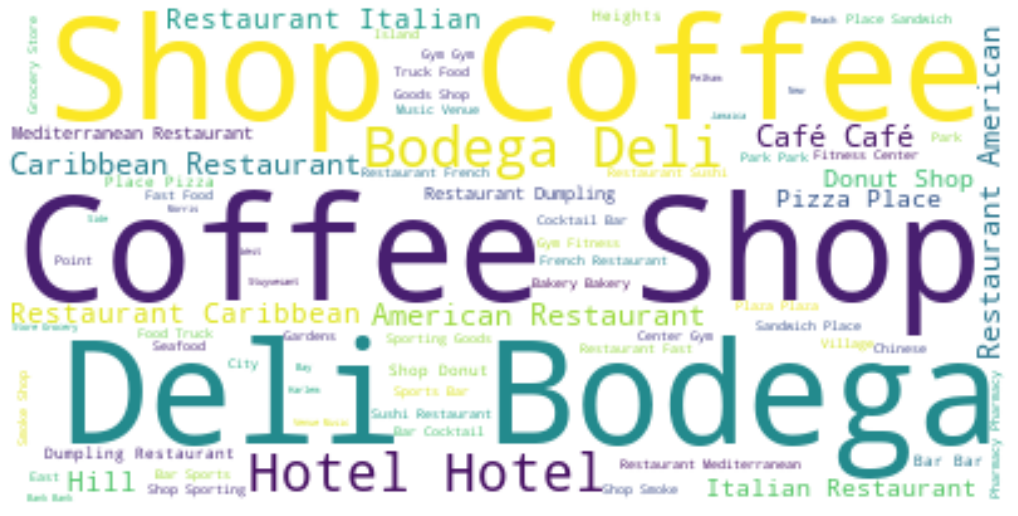

In [87]:
# Generate the WordCloud
top_venues_wc.generate(words)

# Set the Size
plt.figure(figsize=(18, 22))

# Display the WC
plt.imshow(top_venues_wc, interpolation='bilinear')
plt.axis('off')
plt.show()